# Pre-Processing & Training Data Devleopment

In [ ]:
#Importing all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

import seaborn as sns

from sqlalchemy import create_engine

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import sqlite3
from sqlite3 import Error

import os

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, StandardScaler, PowerTransformer
from scipy.stats import linregress
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
#Load the data

os.chdir("C:\\Users\\mohamed.ziane\\OneDrive - Slalom\\Documents\\GitHub\\Climate-Change-in-Kenya\\data\\Processed")

df = pd.read_csv('table_final.csv')

In [ ]:
df.head()

,Unnamed: 0,timestamp,Year_extract,CO2 emissions from liquid fuel consumption (kt)_new,Energy related methane emissions (% of total)_new,Fuel exports (% of merchandise exports)_new,Fuel imports (% of merchandise imports)_new,Methane emissions in energy sector (thousand metric tons of CO2 equivalent)_new,Mineral rents (% of GDP)_new,Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent)_new,...,CT_Relative_Humidity_m,CT_Wind_Speed_10m,CT_Cloud_Cover_Total,CT_Sunshine_Duration,CT_Shortwave_Radiation,CT_Mean_Sea_Level_Pressure,CT_Soil_Temperature_10cm,CT_Soil_Moisture_10cm,CT_Wind_Direction_Dominant_10m,Year_extract_y
0,0,1985-09-01,1985,3115.498132,24.162338,16.476346,28.932601,4279.666073,1.365497,362.545871,...,99,4.457064,15.708333,675.834840,5135.3003,1017.0,75.560020,0.145,292.47943,1985
1,1,1985-09-02,1985,3118.855606,21.529548,18.765827,31.529024,4274.313711,0.703036,362.384262,...,96,7.161691,93.000000,95.744675,4807.7803,1015.1,67.046005,0.141,288.88968,1985
2,2,1985-09-03,1985,3119.868040,26.957457,12.745660,31.855229,4280.127290,-3.874296,361.687885,...,92,8.108701,65.666664,105.773056,2403.0000,1020.8,62.636032,0.137,305.56384,1985
3,3,1985-09-04,1985,3122.340297,22.117795,15.393883,30.340974,4279.056049,0.019061,364.689648,...,90,6.187060,52.820830,379.962770,5029.3896,1021.2,67.369990,0.140,245.22487,1985
4,4,1985-09-05,1985,3119.501944,20.538729,13.529428,30.462148,4279.879428,-1.444538,361.369231,...,100,7.644957,49.208332,423.075840,5007.1406,1023.0,69.944030,0.140,262.43716,1985


### Let's standardize the data on the main features

In [210]:
df_1985_2019 = new_clt_climate_df["1985-09-01":"2019-12-31"]

In [211]:
df_1985_2019_monthly = df_1985_2019.resample('M').mean();

<AxesSubplot:xlabel='timestamp'>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Average Temperature - Fahrenheit')

Text(0.5, 1.0, 'Daily Temperature Variation in Nairobi\n From 1985 to 2019 ')

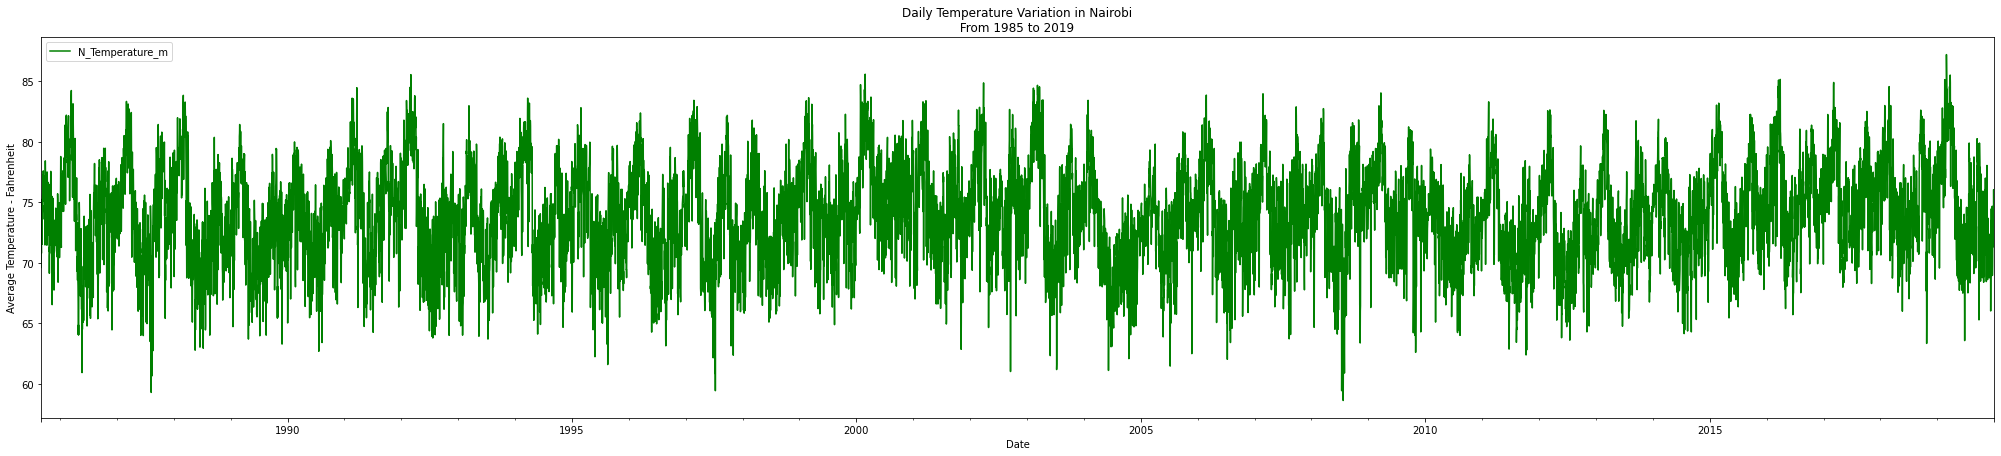

In [212]:
# Visualize some of the 'cleaned' data by plotting the daily avg temperature in Nairobi from 1985 to 2019
df_1985_2019['N_Temperature_m'].plot(figsize=(35,7), color="green")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Average Temperature - Fahrenheit')
plt.title("Daily Temperature Variation in Nairobi\n From 1985 to 2019 ")
plt.show()

<AxesSubplot:xlabel='timestamp'>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Average Temperature - Fahrenheit')

Text(0.5, 1.0, 'Monthly Temperature Variation in Nairobi\n From 1985 to 2019 ')

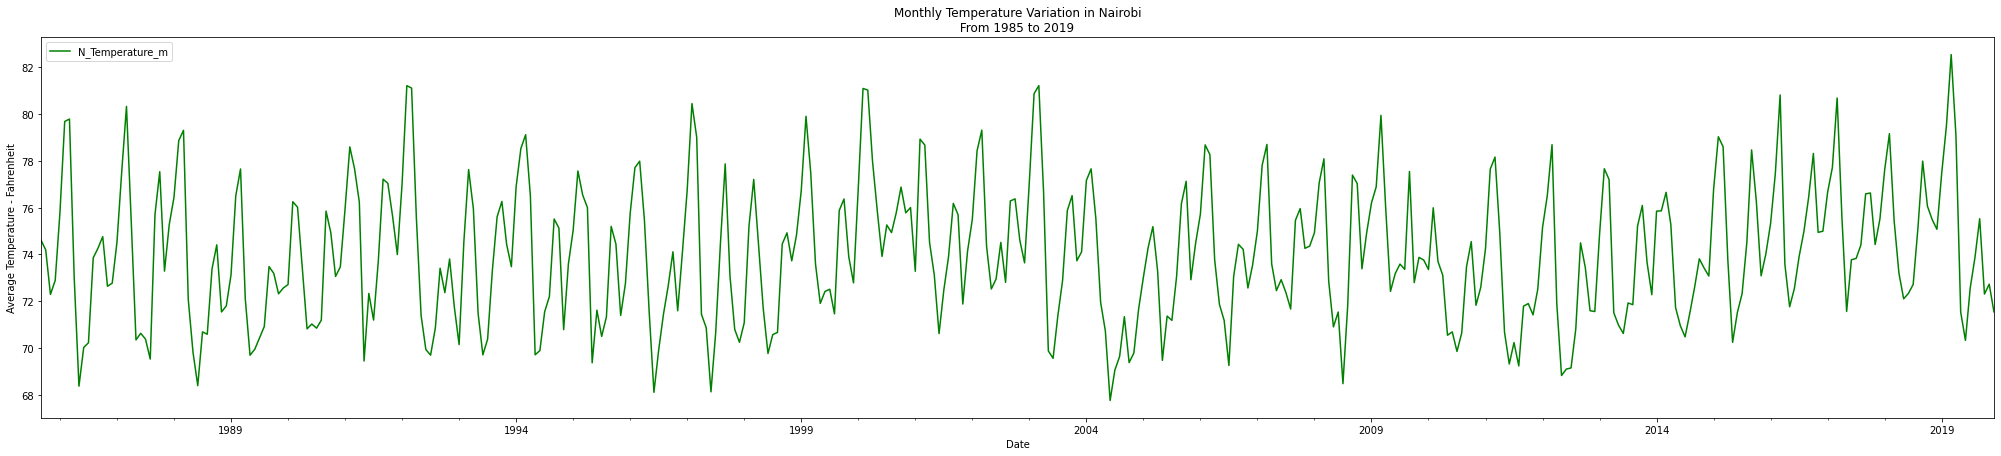

In [213]:
# Visualize some of the 'cleaned' data by plotting the monthly avg temperature in Nairobi from 1985 to 2019
df_1985_2019_monthly['N_Temperature_m'].plot(figsize=(35,7), color="green")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Average Temperature - Fahrenheit')
plt.title("Monthly Temperature Variation in Nairobi\n From 1985 to 2019 ")
plt.show()

In [214]:
df_1985_2019.columns

Index(['CO2 emissions (kt)_new',
       'Methane emissions (kt of CO2 equivalent)_new',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new',
       'Population, total_new', 'N_Temperature_m', 'N_Precipitation_Total'],
      dtype='object')

In [215]:
df_1985_2019.describe().T

,count,mean,std,min,25%,50%,75%,max
CO2 emissions (kt)_new,12540.0,9.589011e+03,4.502752e+03,3.762582e+03,6.138765e+03,7.492004e+03,1.263944e+04,1.889629e+04
Methane emissions (kt of CO2 equivalent)_new,12540.0,2.718258e+04,7.933472e+03,1.765098e+04,2.099878e+04,2.240219e+04,3.592981e+04,4.048676e+04
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new,12540.0,1.286193e+04,3.679070e+03,7.951794e+03,1.010867e+04,1.067174e+04,1.708958e+04,1.876610e+04
"Population, total_new",12540.0,3.503651e+07,9.557250e+06,1.987707e+07,2.695051e+07,3.375175e+07,4.317827e+07,5.257397e+07
N_Temperature_m,12540.0,7.399937e+01,4.039017e+00,5.863105e+01,7.117705e+01,7.406604e+01,7.679304e+01,8.721504e+01
N_Precipitation_Total,12540.0,4.100485e-02,1.269044e-01,0.000000e+00,0.000000e+00,0.000000e+00,2.755905e-02,3.283464e+00


### Standardizing the magnitude of numeric features

In [216]:
scaler = preprocessing.StandardScaler()

In [217]:
scaled_df = scaler.fit_transform(df_1985_2019) 


In [218]:
scaled_df = pd.DataFrame(scaled_df, columns= {'CO2 emissions (kt)_new':'CO2 (kt)', 'Methane emissions (kt of CO2 equivalent)_new': 'Methane (kt)', 'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new':'Nitrous Oxide(kt)', 'Population, total_new':'Total Population','N_Temperature_m':'Temperature (DegF)','N_Precipitation_Total':'Precipitation (in)'}) 

In [219]:
df = scaled_df.rename(columns = {'CO2 emissions (kt)_new':'CO2 (kt)', 'Methane emissions (kt of CO2 equivalent)_new': 'Methane (kt)', 'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new':'Nitrous Oxide(kt)', 'Population, total_new':'Total Population','N_Temperature_m':'Temperature (DegF)','N_Precipitation_Total':'Precipitation (in)'})  

In [220]:
df.columns

Index(['CO2 (kt)', 'Methane (kt)', 'Nitrous Oxide(kt)', 'Total Population',
       'Temperature (DegF)', 'Precipitation (in)'],
      dtype='object')

In [221]:
df_1985_2019.describe().T

,count,mean,std,min,25%,50%,75%,max
CO2 emissions (kt)_new,12540.0,9.589011e+03,4.502752e+03,3.762582e+03,6.138765e+03,7.492004e+03,1.263944e+04,1.889629e+04
Methane emissions (kt of CO2 equivalent)_new,12540.0,2.718258e+04,7.933472e+03,1.765098e+04,2.099878e+04,2.240219e+04,3.592981e+04,4.048676e+04
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new,12540.0,1.286193e+04,3.679070e+03,7.951794e+03,1.010867e+04,1.067174e+04,1.708958e+04,1.876610e+04
"Population, total_new",12540.0,3.503651e+07,9.557250e+06,1.987707e+07,2.695051e+07,3.375175e+07,4.317827e+07,5.257397e+07
N_Temperature_m,12540.0,7.399937e+01,4.039017e+00,5.863105e+01,7.117705e+01,7.406604e+01,7.679304e+01,8.721504e+01
N_Precipitation_Total,12540.0,4.100485e-02,1.269044e-01,0.000000e+00,0.000000e+00,0.000000e+00,2.755905e-02,3.283464e+00


In [222]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CO2 (kt),12540.0,-1.730921e-15,1.00004,-1.294022,-0.766283,-0.465735,0.677485,2.067103
Methane (kt),12540.0,2.208547e-15,1.00004,-1.201489,-0.779489,-0.602584,1.102616,1.677035
Nitrous Oxide(kt),12540.0,-1.825210e-15,1.00004,-1.334668,-0.748389,-0.595334,1.149152,1.604863
Total Population,12540.0,3.451713e-15,1.00004,-1.586235,-0.846094,-0.134434,0.851927,1.835064
Temperature (DegF),12540.0,8.121018e-16,1.00004,-3.805118,-0.698792,0.016508,0.691700,3.272133
Precipitation (in),12540.0,-4.890417e-15,1.00004,-0.323129,-0.323129,-0.323129,-0.105956,25.551430


Text(0.5, 1.0, 'CO2 distribution')

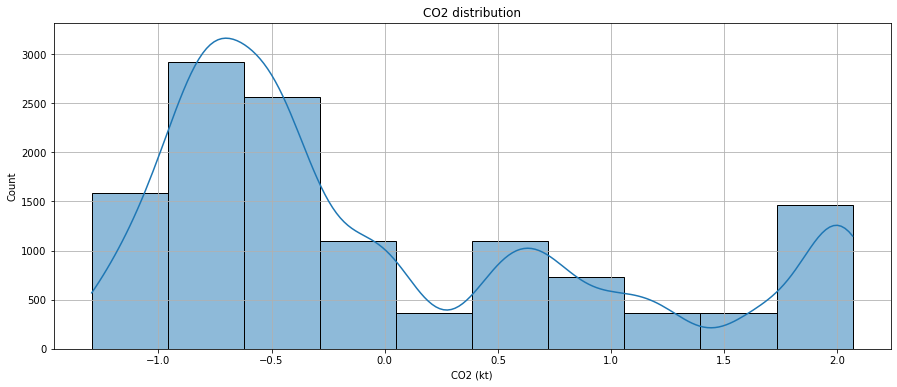

In [223]:
# Making a histogram of the CO2 variable.
f, ax = plt.subplots(figsize = (15,6))
ax = sns.histplot(x=df['CO2 (kt)'], kde=True, bins=10)
ax.set_title('CO2 distribution')
plt.grid(True)

Text(0.5, 1.0, 'Methane distribution')

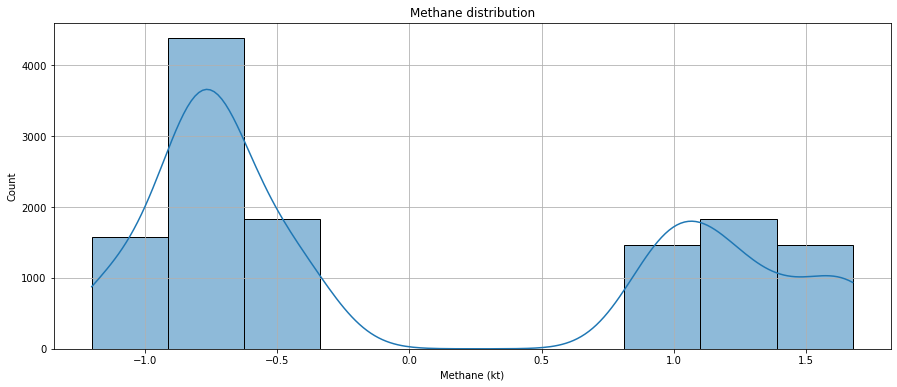

In [224]:
# Making a histogram of the Methane variable.
f, ax = plt.subplots(figsize = (15,6))
ax = sns.histplot(x=df['Methane (kt)'], kde=True, bins=10)
ax.set_title('Methane distribution')
plt.grid(True)

Text(0.5, 1.0, 'Nitrous Oxide distribution')

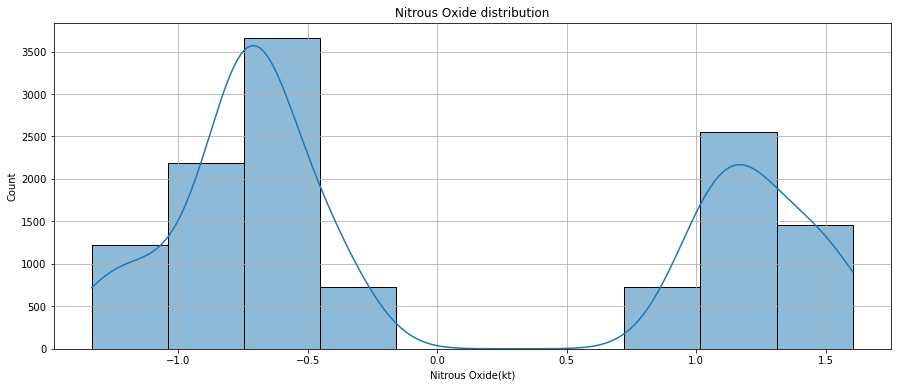

In [225]:
# Making a histogram of the CO2 variable.
f, ax = plt.subplots(figsize = (15,6))
ax = sns.histplot(x=df['Nitrous Oxide(kt)'], kde=True, bins=10)
ax.set_title('Nitrous Oxide distribution')
plt.grid(True)

Text(0.5, 1.0, 'Total Population distribution')

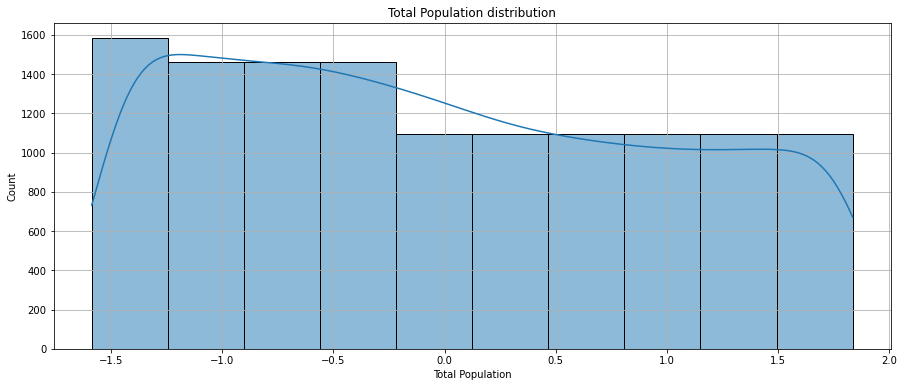

In [226]:
# Making a histogram of the CO2 variable.
f, ax = plt.subplots(figsize = (15,6))
ax = sns.histplot(x=df['Total Population'], kde=True, bins=10)
ax.set_title('Total Population distribution')
plt.grid(True)

Text(0.5, 1.0, 'Temp distribution')

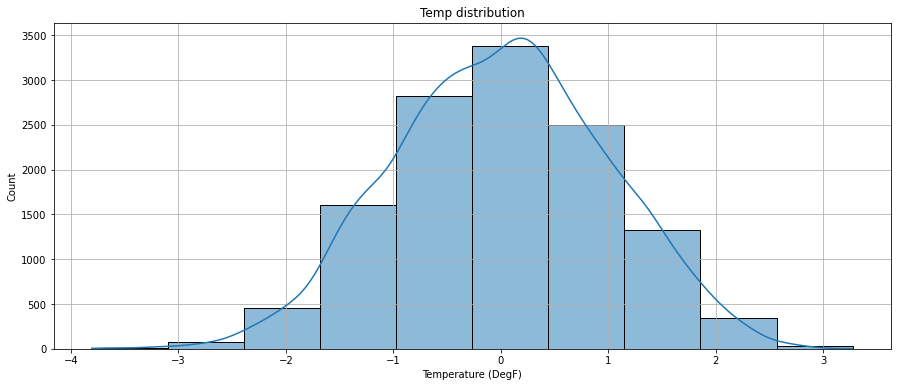

In [227]:
# Making a histogram of the Temperature variable.
f, ax = plt.subplots(figsize = (15,6))
ax = sns.histplot(x=df['Temperature (DegF)'], kde=True, bins=10)
ax.set_title('Temp distribution')
plt.grid(True)

Text(0.5, 1.0, 'Precipitation distribution')

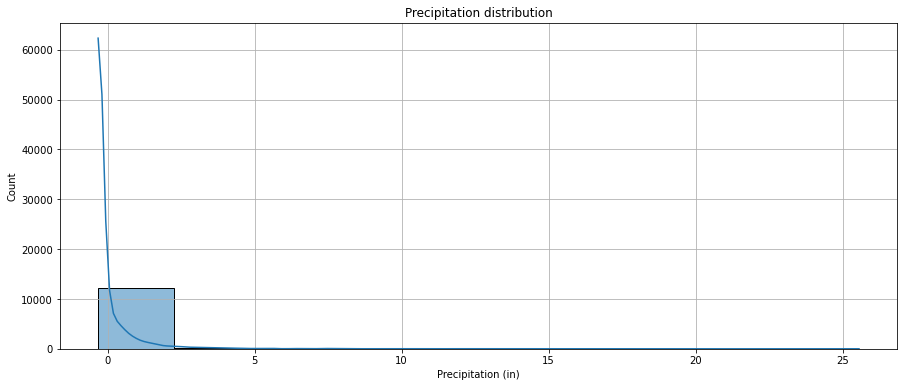

In [228]:
# Making a histogram of the CO2 variable.
f, ax = plt.subplots(figsize = (15,6))
ax = sns.histplot(x=df['Precipitation (in)'], kde=True, bins=10)
ax.set_title('Precipitation distribution')
plt.grid(True)

In [229]:
pow_trans = PowerTransformer()

In [230]:
pow_trans.fit(df[['CO2 (kt)']])

PowerTransformer()

In [231]:
df['CO2 (kt)_2_LG'] = pow_trans.transform(df[['CO2 (kt)']])

In [232]:
pow_trans.fit(df[['Methane (kt)']]); df['Methane (kt)_LG'] = pow_trans.transform(df[['Methane (kt)']])

PowerTransformer()

In [233]:
pow_trans.fit(df[['Nitrous Oxide(kt)']]); df['Nitrous Oxide(kt)_LG'] = pow_trans.transform(df[['Nitrous Oxide(kt)']])

PowerTransformer()

In [234]:
pow_trans.fit(df[['Total Population']]); df['Total Population_LG'] = pow_trans.transform(df[['Total Population']])

PowerTransformer()

In [235]:
pow_trans.fit(df[['Temperature (DegF)']]); df['Temperature (DegF)_LG'] = pow_trans.transform(df[['Temperature (DegF)']])

PowerTransformer()

In [236]:
df

,CO2 (kt),Methane (kt),Nitrous Oxide(kt),Total Population,Temperature (DegF),Precipitation (in),CO2 (kt)_2_LG,Methane (kt)_LG,Nitrous Oxide(kt)_LG,Total Population_LG,Temperature (DegF)_LG
0,-1.292613,-1.200718,-1.333081,-1.586234,-1.082071,-0.323129,-1.967903,-1.558215,-1.706544,-1.719240,-1.079776
1,-1.292205,-1.200854,-1.333438,-1.586234,-0.591831,-0.323129,-1.966895,-1.558495,-1.707220,-1.719240,-0.597831
2,-1.292758,-1.200769,-1.333507,-1.586234,-0.582920,-0.323129,-1.968262,-1.558320,-1.707351,-1.719240,-0.589035
3,-1.292317,-1.201096,-1.332837,-1.586235,-0.792385,-0.323129,-1.967171,-1.558993,-1.706083,-1.719240,-0.795440
4,-1.291938,-1.200972,-1.333359,-1.586234,-0.172903,-0.323129,-1.966236,-1.558738,-1.707069,-1.719240,-0.182630
...,...,...,...,...,...,...,...,...,...,...,...
12535,1.957369,1.647049,1.485754,1.835063,-0.181815,0.545561,1.582721,1.428018,1.350701,1.701623,-0.191502
12536,1.956994,1.647180,1.486669,1.835063,-0.587375,0.328389,1.582575,1.428079,1.351199,1.701623,-0.593433
12537,1.956101,1.647064,1.486688,1.835063,0.508974,-0.292104,1.582225,1.428025,1.351210,1.701623,0.502164
12538,1.957061,1.647675,1.486581,1.835063,-0.008004,-0.323129,1.582601,1.428307,1.351151,1.701623,-0.018105


In [237]:
pow_trans.fit(df[['Precipitation (in)']]); df['Precipitation (in)_LG'] = pow_trans.transform(df[['Precipitation (in)']])

PowerTransformer()

array([[<AxesSubplot:title={'center':'CO2 (kt)'}>,
        <AxesSubplot:title={'center':'CO2 (kt)_2_LG'}>,
        <AxesSubplot:title={'center':'Methane (kt)'}>],
       [<AxesSubplot:title={'center':'Methane (kt)_LG'}>,
        <AxesSubplot:title={'center':'Nitrous Oxide(kt)'}>,
        <AxesSubplot:title={'center':'Nitrous Oxide(kt)_LG'}>],
       [<AxesSubplot:title={'center':'Total Population'}>,
        <AxesSubplot:title={'center':'Total Population_LG'}>,
        <AxesSubplot:title={'center':'Temperature (DegF)'}>],
       [<AxesSubplot:title={'center':'Temperature (DegF)_LG'}>,
        <AxesSubplot:title={'center':'Precipitation (in)'}>,
        <AxesSubplot:title={'center':'Precipitation (in)_LG'}>]],
      dtype=object)

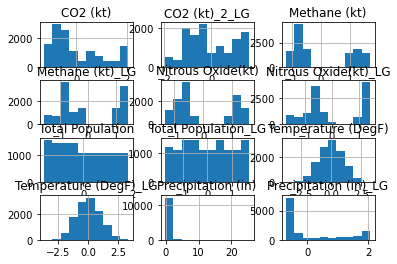

In [238]:
df[['CO2 (kt)','CO2 (kt)_2_LG', 'Methane (kt)', 'Methane (kt)_LG', 'Nitrous Oxide(kt)', 'Nitrous Oxide(kt)_LG','Total Population','Total Population_LG', 'Temperature (DegF)', 'Temperature (DegF)_LG', 'Precipitation (in)', 'Precipitation (in)_LG']].hist()

In [239]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CO2 (kt),12540.0,-1.730921e-15,1.00004,-1.294022,-0.766283,-0.465735,0.677485,2.067103
Methane (kt),12540.0,2.208547e-15,1.00004,-1.201489,-0.779489,-0.602584,1.102616,1.677035
Nitrous Oxide(kt),12540.0,-1.825210e-15,1.00004,-1.334668,-0.748389,-0.595334,1.149152,1.604863
Total Population,12540.0,3.451713e-15,1.00004,-1.586235,-0.846094,-0.134434,0.851927,1.835064
Temperature (DegF),12540.0,8.121018e-16,1.00004,-3.805118,-0.698792,0.016508,0.691700,3.272133
Precipitation (in),12540.0,-4.890417e-15,1.00004,-0.323129,-0.323129,-0.323129,-0.105956,25.551430
CO2 (kt)_2_LG,12540.0,9.865934e-16,1.00004,-1.971388,-0.811040,-0.280555,0.933428,1.624908
Methane (kt)_LG,12540.0,-4.778209e-16,1.00004,-1.559803,-0.761980,-0.470710,1.151709,1.441783
Nitrous Oxide(kt)_LG,12540.0,4.277457e-16,1.00004,-1.709545,-0.701966,-0.473463,1.157810,1.414512
Total Population_LG,12540.0,2.737753e-15,1.00004,-1.719240,-0.837135,-0.058697,0.875879,1.701624


In [240]:
df

,CO2 (kt),Methane (kt),Nitrous Oxide(kt),Total Population,Temperature (DegF),Precipitation (in),CO2 (kt)_2_LG,Methane (kt)_LG,Nitrous Oxide(kt)_LG,Total Population_LG,Temperature (DegF)_LG,Precipitation (in)_LG
0,-1.292613,-1.200718,-1.333081,-1.586234,-1.082071,-0.323129,-1.967903,-1.558215,-1.706544,-1.719240,-1.079776,-0.700926
1,-1.292205,-1.200854,-1.333438,-1.586234,-0.591831,-0.323129,-1.966895,-1.558495,-1.707220,-1.719240,-0.597831,-0.700926
2,-1.292758,-1.200769,-1.333507,-1.586234,-0.582920,-0.323129,-1.968262,-1.558320,-1.707351,-1.719240,-0.589035,-0.700926
3,-1.292317,-1.201096,-1.332837,-1.586235,-0.792385,-0.323129,-1.967171,-1.558993,-1.706083,-1.719240,-0.795440,-0.700926
4,-1.291938,-1.200972,-1.333359,-1.586234,-0.172903,-0.323129,-1.966236,-1.558738,-1.707069,-1.719240,-0.182630,-0.700926
...,...,...,...,...,...,...,...,...,...,...,...,...
12535,1.957369,1.647049,1.485754,1.835063,-0.181815,0.545561,1.582721,1.428018,1.350701,1.701623,-0.191502,1.835934
12536,1.956994,1.647180,1.486669,1.835063,-0.587375,0.328389,1.582575,1.428079,1.351199,1.701623,-0.593433,1.691935
12537,1.956101,1.647064,1.486688,1.835063,0.508974,-0.292104,1.582225,1.428025,1.351210,1.701623,0.502164,-0.423082
12538,1.957061,1.647675,1.486581,1.835063,-0.008004,-0.323129,1.582601,1.428307,1.351151,1.701623,-0.018105,-0.700926


In [241]:
df_LG = df[['CO2 (kt)_2_LG',
       'Methane (kt)_LG',
       'Nitrous Oxide(kt)_LG',
       'Total Population_LG', 'Temperature (DegF)_LG', 
       'Precipitation (in)_LG'

                    ]];


df_LG.head();
df_LG.describe().T

,CO2 (kt)_2_LG,Methane (kt)_LG,Nitrous Oxide(kt)_LG,Total Population_LG,Temperature (DegF)_LG,Precipitation (in)_LG
0,-1.967903,-1.558215,-1.706544,-1.71924,-1.079776,-0.700926
1,-1.966895,-1.558495,-1.707220,-1.71924,-0.597831,-0.700926
2,-1.968262,-1.558320,-1.707351,-1.71924,-0.589035,-0.700926
3,-1.967171,-1.558993,-1.706083,-1.71924,-0.795440,-0.700926
4,-1.966236,-1.558738,-1.707069,-1.71924,-0.182630,-0.700926


,count,mean,std,min,25%,50%,75%,max
CO2 (kt)_2_LG,12540.0,9.865934e-16,1.00004,-1.971388,-0.811040,-0.280555,0.933428,1.624908
Methane (kt)_LG,12540.0,-4.778209e-16,1.00004,-1.559803,-0.761980,-0.470710,1.151709,1.441783
Nitrous Oxide(kt)_LG,12540.0,4.277457e-16,1.00004,-1.709545,-0.701966,-0.473463,1.157810,1.414512
Total Population_LG,12540.0,2.737753e-15,1.00004,-1.719240,-0.837135,-0.058697,0.875879,1.701624
Temperature (DegF)_LG,12540.0,1.227410e-16,1.00004,-3.711125,-0.703304,0.006415,0.687385,3.347446
Precipitation (in)_LG,12540.0,1.033501e-14,1.00004,-0.700926,-0.700926,-0.700926,0.754321,2.070658


### Train and Test Split

In [242]:
# Let's define our features:
features = ['CO2 (kt)_2_LG',
       'Methane (kt)_LG',
       'Nitrous Oxide(kt)_LG',
       'Total Population_LG',]
predictions = ['Temperature (DegF)_LG', 
       'Precipitation (in)_LG']
X=df_LG[features];
y = df_LG[predictions]

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [244]:
df_LG[predictions].count()

Temperature (DegF)_LG    12540
Precipitation (in)_LG    12540
dtype: int64